# Week 4 Problem 4

A few things you should keep in mind when working on assignments:

1. Make sure you fill in any place that says `YOUR CODE HERE`. Do not write your answer in anywhere else other than where it says `YOUR CODE HERE`. Anything you write anywhere else will be removed or overwritten by the autograder.

2. Before you submit your assignment, make sure everything runs as expected. Go to menubar, select *Kernel*, and restart the kernel and run all cells (*Restart & Run all*).

3. Do not change the title (i.e. file name) of this notebook.

4. Make sure that you save your work (in the menubar, select *File* → *Save and CheckPoint*)

5. When you are ready to submit your assignment, go to *Dashboard* → *Assignments* and click the *Submit* button. Your work is not submitted until you click *Submit*.

6. You are allowed to submit an assignment multiple times, but only the most recent submission will be graded.

7. **If your code does not pass the unit tests, it will not pass the autograder.**

# Due Date: 6 PM, February 12, 2018

In [1]:
% matplotlib inline

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import LinearSVR
from nose.tools import assert_equal, assert_in, assert_is_not, assert_is_instance
from numpy.testing import assert_array_equal, assert_array_almost_equal
from pandas.util.testing import assert_frame_equal, assert_index_equal

This week you've learned about regularization, which reduces the impact of overfitting on machine learning models by introducing penalties. You've also learned about the difference between Lasso, Ridge, and ElasticNet regularization methods. Let us dive in deeper into why overfitting is an issue and how regularization can be used to overcome it using other regression models.

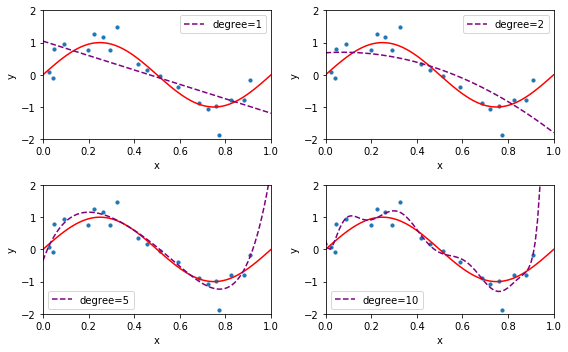

In [2]:
# Let us generate data

# Set the random state for reproducebility
np.random.seed(10)

# generate points used to plot
x_plot = np.linspace(0, 1, 100)

# generate points and keep a subset of them
n_samples = 100
X = np.random.uniform(0, 1, size=n_samples)[:, np.newaxis]
y = np.sin(2 * np.pi * X) + np.random.normal(scale=0.3, size=n_samples)[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

def approximation(estimate, ax, label):
    ax.plot(x_plot, np.sin(2 * np.pi * x_plot), color='red')
    ax.scatter(X_train, y_train, s=10)
    ax.plot(x_plot, estimate.predict(x_plot[:, np.newaxis]), linestyle="--", color='purple', label=label)
    ax.set_ylim((-2, 2))
    ax.set_xlim((0, 1))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend()

fig, axes = plt.subplots(2, 2, figsize=(8, 5))

for ax, degree in zip(axes.ravel(), [1, 2, 5, 10]):
    estimate = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    estimate.fit(X_train, y_train)
    approximation(estimate, ax, label='degree=%d' % degree)
    plt.tight_layout()

We see that the higher polynomial fits the training very well but is very poor at approximating the ground truth. If we plot the training and testing error as a function of the degree of the polynomial we should see that the higher the degree of the polynomial, the lower the training error but the worse the testing error would be.

![prob1_solution](images/prob1_sol.png)

## Question 1

Create a plot of the mean square error of the training and testing data with the different polynomial approximation. Your plot does not need to look exactly like the one shown above but to pass the assertions it should contain the following:

- A plot title
- Two different colored lines representing the two types of data
- Set the limit of the y-axis to be from 0 to 1
- Labels for the axes
- A legend

__Hint__: You should create a pipeline like the example shown above.

In [24]:
def train_test_plot(X_train, y_train, X_test, y_test):
    '''    
    Parameters
    ----------
    X_train: A numpy.ndarray
    y_train: A numpy.ndarray
    X_test: A numpy.ndarray
    y_test: A numpy.ndarray
    
    Returns
    -------
    ax: A matplotlib.Axes instance.
    '''
    
    # Max Polynomial order
    max_deg = 9

    # Initialize arrays
    train_error = np.empty(max_deg)
    test_error = np.empty(max_deg)

    # Generate polynomial fits and compute MSE for training and testing data sets
    for deg in range(1, max_deg + 1):
        est = make_pipeline(PolynomialFeatures(deg), LinearRegression())
        est.fit(X_train, y_train)
        train_error[deg - 1] = mean_squared_error(y_train, est.predict(X_train))
        test_error[deg - 1] = mean_squared_error(y_test, est.predict(X_test))

    # Create figure area
    fig, axs = plt.subplots(figsize=(10, 6))

    # Plot the training and testing performance
    xp = np.arange(1, max_deg + 1)
    axs.plot(xp, train_error, linestyle='-', lw=2.5,
             color=sns.xkcd_rgb["black"], alpha = 0.75,
             label='Train')
    axs.plot(xp, test_error, linestyle='-', lw=2.5,
             color=sns.xkcd_rgb["red"], alpha = 0.75,
             label='Test')

    # Decorate plot
    axs.set(title='Regression Model Performance',
           xlabel='Polynomial Degree', xlim=(0, 9),
           ylabel='MSE', ylim=(0., 1))
    axs.legend(loc=3, borderaxespad=1.5)
    sns.despine(offset=0, trim=True)
    

    return axs

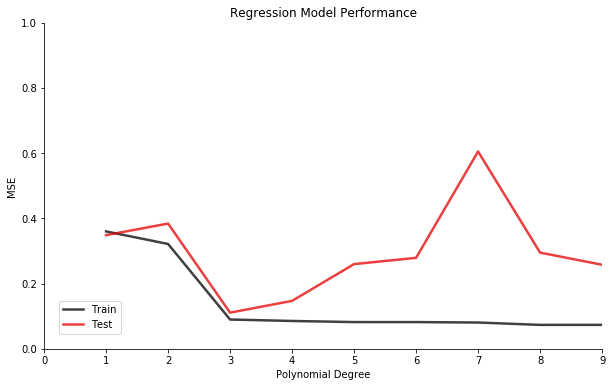

In [25]:
# Check your plot to see if it is the same as the above.
ax = train_test_plot(X_train, y_train, X_test, y_test)

In [26]:
# Check to see if an Axes object is returned
assert_is_instance(
    ax, mpl.axes.Axes,
    msg="Your function should return a matplotlib.axes.Axes object."
)

# Check if the title is set
assert_is_not(
    len(ax.title.get_text()), 0,
    msg="Your plot doesn't have a title."
)

# Check if the x-axis has a label.
assert_is_not(
    ax.xaxis.get_label_text(), '',
    msg="Change the x-axis label to something more descriptive."
)

# Check if the y-axis has a label.
assert_is_not(
    ax.yaxis.get_label_text(), '',
    msg="Change the y-axis label to something more descriptive."
)

# Check the y-axis limit
assert_equal(ax.get_ylim(), (0,1),
             msg="Change the y-axis limit to be (0,1)"
)

# Check the numbers of ROC curves plotted
assert_equal(len(ax.lines), 2,
             msg="Make sure to plot the 2 plot lines for the two types of data.")

# Check if legend exists
assert_equal(len(ax.get_legend_handles_labels()) > 0, True,
             msg="Make sure you create a legend."
)

# Check to see if each curve is of different color
colors = []
for i in range(0,2):
    colors.append(ax.lines[i].get_color())
assert_equal(len(list(set(colors))), 2,
             msg="Make sure the colors of each line color is unique.")

There are several models which have built-in penalty parameter(s) to overcome overfitting.. Let us explore how well Ridge and Lasso regression performs compared to these models.

In [27]:
alphas = [1,0.1,0.01,0.001,0.0001]

# Determine the best ridge regression model
ridge_model = Ridge()
grid_ridge = GridSearchCV(estimator=ridge_model, param_grid=dict(alpha=alphas))
grid_ridge.fit(X_train, y_train)
print("Best Alpha:", grid_ridge.best_estimator_.alpha)
print("Ridge Score:", grid_ridge.score(X_test, y_test))
print("===")

# Determine the best Lasso regression model
lasso_model = Lasso()
grid_lasso = GridSearchCV(estimator=lasso_model, param_grid=dict(alpha=alphas))
grid_lasso.fit(X_train, y_train)
print("Best Alpha:", grid_lasso.best_estimator_.alpha)
print("Lasso Score:", grid_lasso.score(X_test, y_test))

Best Alpha: 0.1
Ridge Score: 0.454085933762
===
Best Alpha: 0.01
Lasso Score: 0.453850064803


## Question 2

Previously we've used Support Vector Machine (SVM) for the purpose of classification. However, SVM can also be used for regression. Create a function called `perform_LinearSVR()` which performs a grid search on parameters `loss` and `C` for a Linear Support Vector Regression model. Refer to the sklearn [svm.LinearSVR](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html#sklearn.svm.LinearSVR) documentation for more information.

The `loss` parameter determines the type of loss function. `epsilon_insensitive` corresponds to L1 norm and `squared_epsilon_insensitive` corresponds to L2 norm. Determine which norm is the best along with the best value of `C` (make the search space for `C` to be 1, 10, 100, and 1000). Also, fit the training data to your model within the function.

Your function should return a GridSearchCV instance.

In [30]:
def perform_LinearSVR(X_train, y_train):
    '''    
    Parameters
    ----------
    X_train: A numpy.ndarray
    y_train: A numpy.ndarray
    
    Returns
    -------
    model: A sklearn GridSearchCV instance.
    '''
    regr = LinearSVR(random_state=0)
    
    # Create a dictionary of hyperparameters and values      
    params = {'loss': ('epsilon_insensitive', 'squared_epsilon_insensitive'),
              'C': (1, 10, 100, 1000)}
    
    # Create grid search cross validator
    model = GridSearchCV(estimator=regr, param_grid=params)
    model.fit(X_train, y_train)
    
    return model

In [31]:
# Note, we need to transform the y_train and y_test for SVR
svr_model = perform_LinearSVR(X_train, y_train.ravel())
print("Best C:", svr_model.best_estimator_.C)
print("Best Loss:", svr_model.best_estimator_.loss)
print("SVR Score:", svr_model.score(X_test, y_test.ravel()))

Best C: 1
Best Loss: squared_epsilon_insensitive
SVR Score: 0.439064878154


In [32]:
assert_equal(type(svr_model), type(GridSearchCV(None, {})), msg='Return a Grid Search')
assert_equal(type(svr_model.best_estimator_), type(LinearSVR()))


## Question 3

We've also studied Gradient Boosting when we were discussing ensemble methods. Gradient Boosting can also be used for regression problems in addition to classification. Create a function called `perform_GBR()` which performs a grid search on parameters `loss` for a GBR model. Refer to the sklearn [svm.ensemble.GradientBoostingRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html) documentation for more information.

The `loss` parameter determines the type of loss function. Determine which loss function is best in your grid search (there are four in total 'ls', 'lad', 'huber', 'quantile').  Also, fit the training data to your model within the function.

Your function should return a GridSearchCV instance.

In [33]:
def perform_GBR(X_train, y_train):
    '''    
    Parameters
    ----------
    X_train: A numpy.ndarray
    y_train: A numpy.ndarray
    
    Returns
    -------
    model: A sklearn GridSearchCV instance.
    '''
    gbr =GradientBoostingRegressor(random_state=0)
    
    # Create a dictionary of hyperparameters and values      
    params = {'loss': ( 'ls', 'lad', 'huber', 'quantile')}
    
    # Create grid search cross validator
    model = GridSearchCV(estimator=gbr, param_grid=params)
    model.fit(X_train, y_train)
    
    return model

In [34]:
# Note, we need to transform the y_train and y_test for GBR
gbr_model = perform_GBR(X_train, y_train.ravel())
print("Best Loss:", gbr_model.best_estimator_.loss)
print("GBR Score:", gbr_model.score(X_test, y_test.ravel()))

Best Loss: lad
GBR Score: 0.749163161542


In [35]:
assert_equal(type(gbr_model), type(GridSearchCV(None, {})), msg='Return a Grid Search')
assert_equal(type(gbr_model.best_estimator_), type(GradientBoostingRegressor()))
